# pandas 读写文件
- pandas手册 IO TOOLS部分

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from IPython.display import Image

from io import StringIO
from io import BytesIO

import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

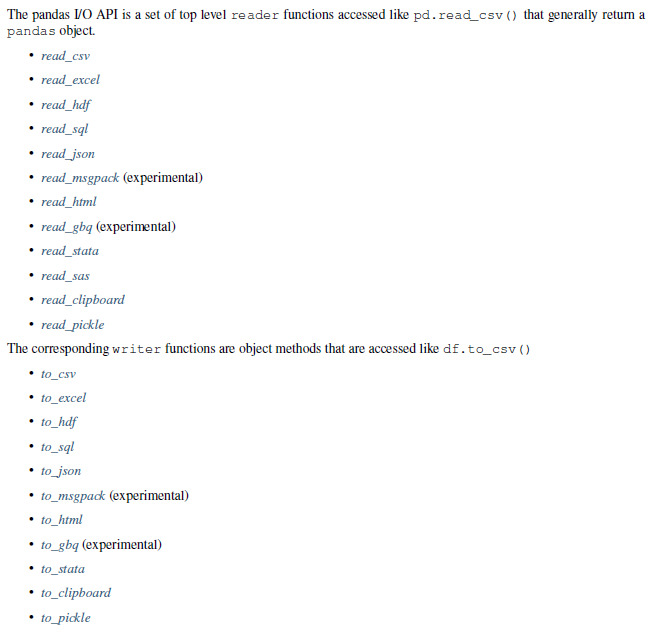

In [2]:
Image(filename="py35_picture\pandas_IO.png")

## 一、CSV & Text

### 2.1 写入
- 语法：
> - DataFrame.to_csv(path_or_buf=None, sep=', ', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.', **kwds)

In [ ]:
# 不要列头，不要索引，只要open,high两列
df.to_csv('/tmp/9.csv',columns=['open','high'],index=False,header=False)

In [ ]:
save = pd.DataFrame({'english':a,'number':b})  
save.to_csv('b.txt',index=False,sep='')

In [23]:
data = {'A':['a','b','c'],'B':[1,3,4],'C':[2,4,5]}
date = np.arange(20090101,20090104)
foo = pd.DataFrame(data,index = date)
foo.columns.name = 'date'
foo.to_csv('foo.csv',)
foo

date,A,B,C
20090101,a,1,2
20090102,b,3,4
20090103,c,4,5


In [33]:
data = {'date':np.arange(20090101,20090104),'A':['a','b','c'],'B':[1,3,4],'C':[2,4,5]}
foo = pd.DataFrame(data,columns =['date','A','B','C'])
foo.to_csv('py35_data\\sentdex\\foo.csv',index = False)
foo

,date,A,B,C
0,20090101,a,1,2
1,20090102,b,3,4
2,20090103,c,4,5


In [47]:
df = pd.DataFrame({'col_1':list(np.arange(500000)) + ['a', 'b'] + list(np.arange(500000))})

df.to_csv('foo')

In [48]:
mixed_df = pd.read_csv('foo')
mixed_df['col_1'].apply(type).value_counts()

D:\software\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'int'>    737858
<class 'str'>    262144
Name: col_1, dtype: int64

In [49]:
mixed_df['col_1'].dtype

dtype('O')

### 2.2 读取
- 语法：
> - pandas.read_csv(filepath_or_buffer, sep=', ', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)

In [79]:
print(open('py35_data\\sentdex\\foo.csv').read())
pd.read_csv('py35_data\\sentdex\\foo.csv')

date,A,B,C
20090101,a,1,2
20090102,b,3,4
20090103,c,4,5



,date,A,B,C
0,20090101,a,1,2
1,20090102,b,3,4
2,20090103,c,4,5


#### 1 指定换行方式

In [80]:
data = 'a,b,c~1,2,3~4,5,6'
print(data)
pd.read_csv(StringIO(data), lineterminator='~')

a,b,c~1,2,3~4,5,6


,a,b,c
0,1,2,3
1,4,5,6


In [81]:
data = 'a, b, c\n1, 2, 3\n4, 5, 6'
print(data)
pd.read_csv(StringIO(data), skipinitialspace=True)

a, b, c
1, 2, 3
4, 5, 6


,a,b,c
0,1,2,3
1,4,5,6


#### 2 指定索引列

In [36]:
pd.read_csv('py35_data\\sentdex\\foo.csv', index_col=0)  # 或为  index_col='date'

,A,B,C
date,,,
20090101,a,1,2
20090102,b,3,4
20090103,c,4,5


In [37]:
pd.read_csv('py35_data\\sentdex\\foo.csv', index_col=[0, 'A'])  # 多层索引

,,B,C
date,A,,
20090101,a,1,2
20090102,b,3,4
20090103,c,4,5


#### 3 指定列数据类型

In [86]:
data = 'a,b,c\n1,2,3\n4,5,6\n7,8,9'
print(data)
df = pd.read_csv(StringIO(data), dtype=object)
print(df)
df.dtypes

a,b,c
1,2,3
4,5,6
7,8,9
   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


a    object
b    object
c    object
dtype: object

In [84]:
df = pd.read_csv(StringIO(data), dtype={'b': object, 'c': np.float64})
df.dtypes

a      int64
b     object
c    float64
dtype: object

In [87]:
data = "col_1\n1\n2\n'A'\n4.22"
print(data)
df = pd.read_csv(StringIO(data), converters={'col_1':str})
print(df)
df['col_1'].apply(type).value_counts()

col_1
1
2
'A'
4.22
  col_1
0     1
1     2
2   'A'
3  4.22


<class 'str'>    4
Name: col_1, dtype: int64

#### 4 指定类别格式

In [74]:
data = 'col1,col2,col3\na,b,1\na,b,2\nc,d,3'
print(data)
pd.read_csv(StringIO(data))

col1,col2,col3
a,b,1
a,b,2
c,d,3


,col1,col2,col3
0,a,b,1
1,a,b,2
2,c,d,3


In [73]:
print(pd.read_csv(StringIO(data)).dtypes)
print(pd.read_csv(StringIO(data), dtype='str').dtypes)
pd.read_csv(StringIO(data), dtype={'col3': 'str'}).dtypes

col1    object
col2    object
col3     int64
dtype: object
col1    object
col2    object
col3    object
dtype: object


col1    object
col2    object
col3    object
dtype: object

#### 5 指定列名

In [75]:
data = 'a,b,c\n1,2,3\n4,5,6\n7,8,9'
print(data)
pd.read_csv(StringIO(data))

a,b,c
1,2,3
4,5,6
7,8,9


,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [76]:
pd.read_csv(StringIO(data), names=['foo', 'bar', 'baz'], header=0)

,foo,bar,baz
0,1,2,3
1,4,5,6
2,7,8,9


In [77]:
pd.read_csv(StringIO(data), names=['foo', 'bar', 'baz'], header=None)

,foo,bar,baz
0,a,b,c
1,1,2,3
2,4,5,6
3,7,8,9


In [78]:
data = 'skip this skip it\na,b,c\n1,2,3\n4,5,6\n7,8,9'
print(data)
pd.read_csv(StringIO(data), header=1)

skip this skip it
a,b,c
1,2,3
4,5,6
7,8,9


,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


#### 6 重名

In [88]:
data = 'a,b,a\n0,1,2\n3,4,5'
pd.read_csv(StringIO(data))

,a,b,a.1
0,0,1,2
1,3,4,5


In [89]:
pd.read_csv(StringIO(data), mangle_dupe_cols=False)

,a,b,a
0,2,1,2
1,5,4,5


#### 7 过滤列

In [90]:
data = 'a,b,c,d\n1,2,3,foo\n4,5,6,bar\n7,8,9,baz'
pd.read_csv(StringIO(data))

,a,b,c,d
0,1,2,3,foo
1,4,5,6,bar
2,7,8,9,baz


In [91]:
pd.read_csv(StringIO(data), usecols=['b', 'd'])

,b,d
0,2,foo
1,5,bar
2,8,baz


In [92]:
pd.read_csv(StringIO(data), usecols=[0, 2, 3])

,a,c,d
0,1,3,foo
1,4,6,bar
2,7,9,baz


#### 8 注释行和空行

In [93]:
data = '\na,b,c\n \n# commented line\n1,2,3\n\n4,5,6'
print(data)


a,b,c
 
# commented line
1,2,3

4,5,6


In [94]:
pd.read_csv(StringIO(data), comment='#')

,a,b,c
0,1,2,3
1,4,5,6


In [96]:
data = 'a,b,c\n\n1,2,3\n\n\n4,5,6'
print(data)

a,b,c

1,2,3


4,5,6


In [97]:
pd.read_csv(StringIO(data), skip_blank_lines=False)

,a,b,c
0,NaN,NaN,NaN
1,1.0,2.0,3.0
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,4.0,5.0,6.0


In [98]:
data = '#comment\na,b,c\nA,B,C\n1,2,3'
print(data)
pd.read_csv(StringIO(data), comment='#', header=1)

#comment
a,b,c
A,B,C
1,2,3


,A,B,C
0,1,2,3


In [99]:
data = 'A,B,C\n#comment\na,b,c\n1,2,3'
print(data)
pd.read_csv(StringIO(data), comment='#', skiprows=2)

A,B,C
#comment
a,b,c
1,2,3


,a,b,c
0,1,2,3


#### 9 处理 Unicode 数据

In [104]:
data = b'word,length\nTr\xc3\xa4umen,7\nGr\xc3\xbc\xc3\x9fe,5'.decode('utf8').encode('latin-1')
print(data)
df = pd.read_csv(BytesIO(data), encoding='latin-1')
print(df['word'][1])
df

b'word,length\nTr\xe4umen,7\nGr\xfc\xdfe,5'
Grüße


,word,length
0,Träumen,7
1,Grüße,5


In [105]:
data = 'a,b,c\n4,apple,bat,5.7\n8,orange,cow,10'
pd.read_csv(StringIO(data))

,a,b,c
4,apple,bat,5.7
8,orange,cow,10.0


In [106]:
data = 'index,a,b,c\n4,apple,bat,5.7\n8,orange,cow,10'
pd.read_csv(StringIO(data), index_col=0)

,a,b,c
index,,,
4,apple,bat,5.7
8,orange,cow,10.0


In [113]:
df = pd.read_csv('py35_data\\sentdex\\foo.csv', index_col=0, parse_dates=True)
print(df.index)
df

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03'], dtype='datetime64[ns]', name='date', freq=None)


,A,B,C
date,,,
2009-01-01,a,1,2
2009-01-02,b,3,4
2009-01-03,c,4,5


In [111]:
df = pd.read_csv('foo.csv', index_col=0, parse_dates=True,infer_datetime_format=True)
df

,A,B,C
2009-01-01,a,1,2
2009-01-02,b,3,4
2009-01-03,c,4,5


#### 10 空值
- read_csv(path, na_values=[5])
> - 除了5,5.0以外，都识别为空值
- read_csv(path, keep_default_na=False, na_values=[""])
> - 只有空格识别为空值
- read_csv(path, keep_default_na=False, na_values=["NA", "0"])
- read_csv(path, na_values=["Nope"])

#### 11 布尔值

In [114]:
data= 'a,b,c\n1,Yes,2\n3,No,4'
print(data)
pd.read_csv(StringIO(data))

a,b,c
1,Yes,2
3,No,4


,a,b,c
0,1,Yes,2
1,3,No,4


In [115]:
pd.read_csv(StringIO(data), true_values=['Yes'], false_values=['No'])

,a,b,c
0,1,True,2
1,3,False,4


#### 12 Handling “bad” lines

In [119]:
data = 'a,b,c\n1,2,3\n4,5,6,7\n8,9,10'
print(data)
# pd.read_csv(StringIO(data))

a,b,c
1,2,3
4,5,6,7
8,9,10


In [118]:
pd.read_csv(StringIO(data), error_bad_lines=False)

b'Skipping line 3: expected 3 fields, saw 4\n'


,a,b,c
0,1,2,3
1,8,9,10


#### 13 跳过字符  Quoting and Escape Characters

In [120]:
data = 'a,b\n"hello, \\"Bob\\", nice to see you",5'
print(data)
pd.read_csv(StringIO(data), escapechar='\\')

a,b
"hello, \"Bob\", nice to see you",5


,a,b
0,"hello, ""Bob"", nice to see you",5


## 二、EXCEL

### 1 写入
- df.to_excel('path_to_file.xlsx', sheet_name='Sheet1')
- df.to_excel('path_to_file.xlsx', index_label='label', merge_cells=False)
- with ExcelWriter('path_to_file.xlsx') as writer:
    df1.to_excel(writer, sheet_name='Sheet1')
    df2.to_excel(writer, sheet_name='Sheet2')

### 2 读取

In [127]:
data = pd.DataFrame({'a':[1,2,3,4], 'b':[5,6,7,8]},index=pd.MultiIndex.from_product([['a','b'],['c','d']]))
print(data)
data.to_excel('path_to_file.xlsx')
df = pd.read_excel('path_to_file.xlsx')
df

     a  b
a c  1  5
  d  2  6
b c  3  7
  d  4  8


,,a,b
a,c,1,5
NaN,d,2,6
b,c,3,7
NaN,d,4,8


In [122]:
df = pd.read_excel('path_to_file.xlsx', index_col=[0,1])
df

a  b
a c  1  5
  d  2  6
b c  3  7
  d  4  8

In [130]:
data.index = data.index.set_names(['lvl1', 'lvl2'])
data.columns.name = 'A'
print(data)
data.to_excel('path_to_file.xlsx')
df = pd.read_excel('path_to_file.xlsx')
df

A          a  b
lvl1 lvl2      
a    c     1  5
     d     2  6
b    c     3  7
     d     4  8


,lvl1,lvl2,a,b
0,a,c,1,5
1,NaN,d,2,6
2,b,c,3,7
3,NaN,d,4,8


In [132]:
df = pd.read_excel('path_to_file.xlsx', index_col=[0,1],)
df

a  b
lvl1 lvl2      
a    c     1  5
     d     2  6
b    c     3  7
     d     4  8

In [133]:
data.columns = pd.MultiIndex.from_product([['a'],['b', 'd']], names=['c1', 'c2'])
print(data)
data.to_excel('path_to_file.xlsx')
df = pd.read_excel('path_to_file.xlsx')
df

c1         a   
c2         b  d
lvl1 lvl2      
a    c     1  5
     d     2  6
b    c     3  7
     d     4  8


,c1,a,Unnamed: 2
NaN,c2,b,d
lvl1,lvl2,NaN,NaN
a,c,1,5
NaN,d,2,6
b,c,3,7
NaN,d,4,8


In [134]:
df = pd.read_excel('path_to_file.xlsx',index_col=[0,1], header=[0,1])
df

c1         a   
c2         b  d
lvl1 lvl2      
a    c     1  5
     d     2  6
b    c     3  7
     d     4  8